In [202]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/foodcom-recipes-and-reviews/recipes.parquet
/kaggle/input/foodcom-recipes-and-reviews/reviews.parquet
/kaggle/input/foodcom-recipes-and-reviews/reviews.csv
/kaggle/input/foodcom-recipes-and-reviews/recipes.csv


In [203]:
# Loading the data
dataset = pd.read_csv("/kaggle/input/foodcom-recipes-and-reviews/recipes.csv")
dataset.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


# Data Preprocessing

# Column Selection

In [204]:
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]
dataset.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


<h4>Considering columns which are required for our model

# Data Cleaning :Handling Null Values and Duplicates

In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               522517 non-null  int64  
 1   Name                   522517 non-null  object 
 2   CookTime               439972 non-null  object 
 3   PrepTime               522517 non-null  object 
 4   TotalTime              522517 non-null  object 
 5   RecipeIngredientParts  522517 non-null  object 
 6   Calories               522517 non-null  float64
 7   FatContent             522517 non-null  float64
 8   CholesterolContent     522517 non-null  float64
 9   SodiumContent          522517 non-null  float64
 10  CarbohydrateContent    522517 non-null  float64
 11  FiberContent           522517 non-null  float64
 12  SugarContent           522517 non-null  float64
 13  ProteinContent         522517 non-null  float64
 14  RecipeInstructions     522517 non-nu

<h3>Removing Duplicates

In [206]:
dataset = dataset.drop_duplicates()

<h3>Removeing Drop Null values

In [207]:
dataset = dataset.dropna()

In [208]:
dataset

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522511,541378,Meg's Pumpkin Spice Bread,PT45M,PT30M,PT1H15M,"c(""eggs"", ""water"", ""pumpkin"", ""baking soda"", ""...",898.2,34.8,106.3,903.3,139.0,2.6,86.8,10.8,"c(""Beat eggs, add oil, water, and pumpkin; mix..."
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,"c(""Dijon mustard"", ""garlic"", ""peppercorns"", ""s...",2063.4,172.4,433.8,766.3,3.2,0.7,0.1,117.0,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,"c(""half-and-half"", ""heavy cream"", ""brandy"", ""s...",1271.3,117.2,470.9,192.5,33.9,0.0,17.3,12.8,"c(""heat half and half and heavy cream to a sim..."


<h4>After datacleaning we are left with 439972 unique recipes

# Feature Engineering 

<h2>'Veg_Nonveg' Labeling
we have created a nonveg list with almost all possible nonveg ingredients. 
By using this "nonveg" list we categorized the recipes whether they belong to veg to nonveg

In [209]:
nonveg = ["beef", "pork", "lamb", "goat", "venison", "bison", "rabbit",
          "chicken", "turkey", "duck", "quail", "goose", "salmon","egg","eggs","half boiled eggs","half boiled egg",
          "tuna", "cod", "haddock", "trout", "shrimp", "crab", "lobster","egg yolk","egg white","hard-boiled eggs",
          "mussels", "clams", "oysters", "squid", "calamari", "octopus","meat", 
          "bacon", "sausages", "hot dogs", "ham", "pepperoni", "salami","chicken broth","chicken pieces","hard-boiled eggs","eggplants","fish sauce",
          "lard", "pork fa", "tallow", "mutton fat","ground beef","bacon","chicken breast","shrimp","chicken broth", "chicken stock", "beef broth", "beef stock", "fish stock",
          "chicken thigh", "chicken leg", "chicken breast", "chicken wings", "chicken drumstick", "chicken liver"]

# Function to label data as veg or nonveg
def label_dish(ingredient_str):
    # Remove "c(" at the beginning and ")" at the end of the string
    ingredient_str = ingredient_str.lstrip("c(").rstrip(")")
    
    # Split the string into a list of ingredients
    ingredients = [ingredient.strip().lower() for ingredient in ingredient_str.split(",")]
    
    for ingredient in ingredients:
        for nonveg_item in nonveg:
            if nonveg_item in ingredient:
                return "nonveg"
    return "vegetarian"

# Apply the function to label each row in the dataset
dataset["Veg_Nonveg"] = dataset["RecipeIngredientParts"].apply(label_dish)

# Using .loc to assign values without the warning
dataset.loc[dataset.index, "Veg_Nonveg"] = dataset["Veg_Nonveg"]


In [210]:
dataset

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and...",nonveg
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ...",vegetarian
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",nonveg
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil...",vegetarian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522511,541378,Meg's Pumpkin Spice Bread,PT45M,PT30M,PT1H15M,"c(""eggs"", ""water"", ""pumpkin"", ""baking soda"", ""...",898.2,34.8,106.3,903.3,139.0,2.6,86.8,10.8,"c(""Beat eggs, add oil, water, and pumpkin; mix...",nonveg
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak...",nonveg
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,"c(""Dijon mustard"", ""garlic"", ""peppercorns"", ""s...",2063.4,172.4,433.8,766.3,3.2,0.7,0.1,117.0,"c(""Position rack in center of oven and preheat...",vegetarian
522514,541381,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,"c(""half-and-half"", ""heavy cream"", ""brandy"", ""s...",1271.3,117.2,470.9,192.5,33.9,0.0,17.3,12.8,"c(""heat half and half and heavy cream to a sim...",vegetarian


<h3>The column "Veg_Nonveg" has been labeled to categorize whether the recipe belongs to veg or non-veg type of recipe 

In [211]:
# Count the number of veg and non_veg recipes
veg_count = dataset[dataset['Veg_Nonveg'] == 'vegetarian']['Veg_Nonveg'].count()
non_veg_count = dataset[dataset['Veg_Nonveg'] == 'nonveg']['Veg_Nonveg'].count()

# Print the counts
print("Number of vegetarian recipes:", veg_count)
print("Number of non-vegetarian recipes:", non_veg_count)

Number of vegetarian recipes: 192148
Number of non-vegetarian recipes: 247824


<h3>After categorizing the recipe into veg nonveg.
we observed that our data has 192148 veg recipes and 247824 nonveg recipes.

# Data Visualization

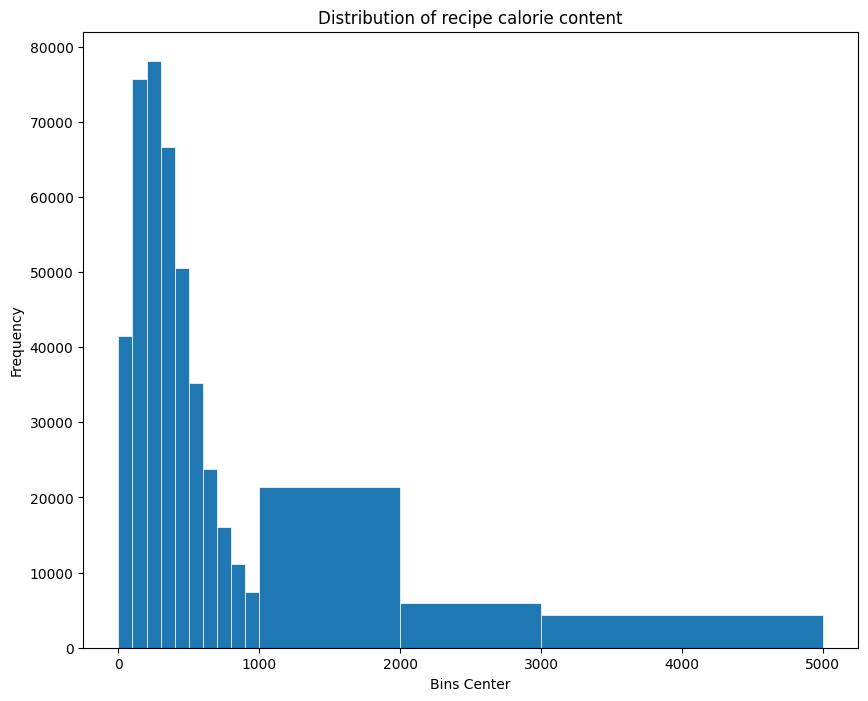

In [212]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe calorie content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

<h3>Most of the recipes fall in range of 200 caorie content

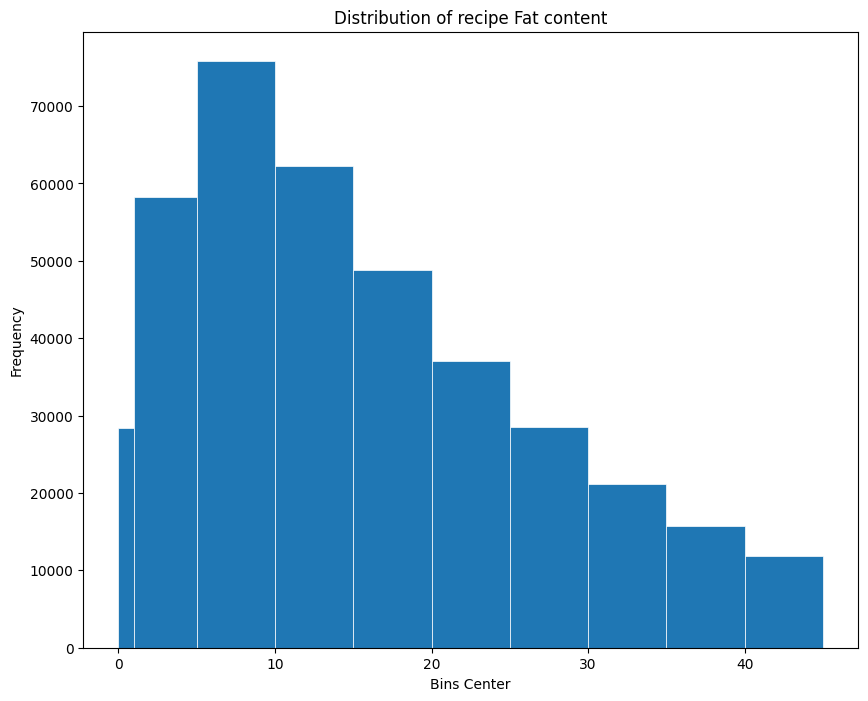

In [213]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Fat content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.FatContent.to_numpy(),bins=[0,1,5,10,15,20,25,30,35,40,45],linewidth=0.5, edgecolor="white")
plt.show()

<h3>Most of the recipes fall in range of 5-10 Fat content

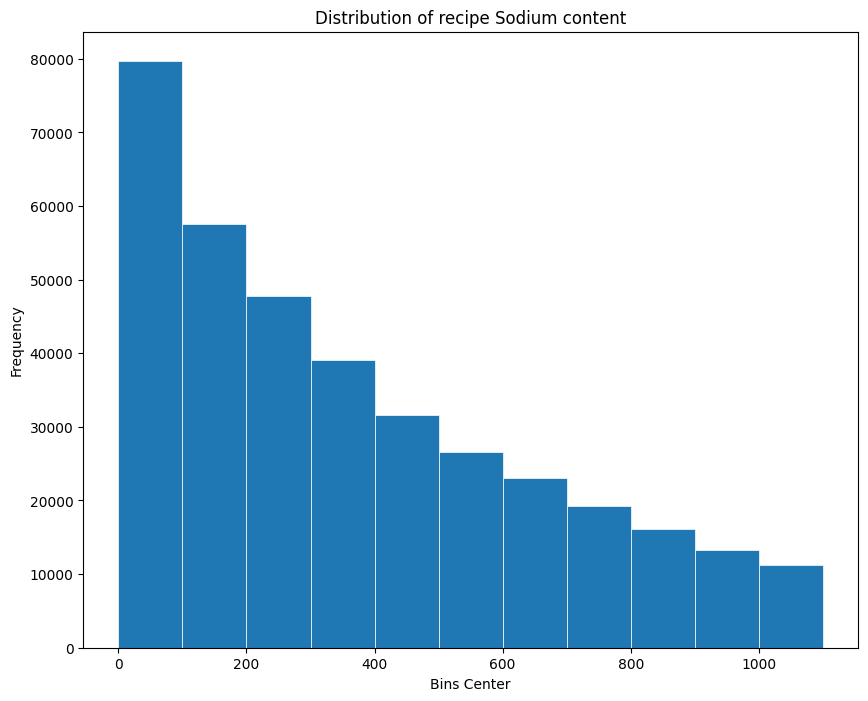

In [214]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Sodium content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.SodiumContent.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1100],linewidth=0.5, edgecolor="white")
plt.show()

<h3>Most of the recipes fall in range of 0-100 Sodium content

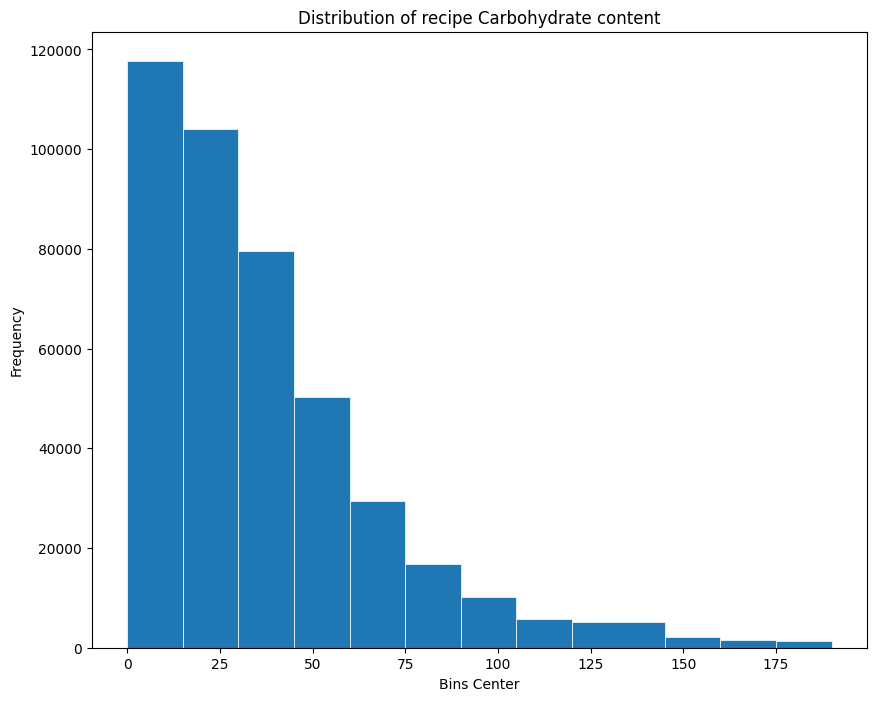

In [215]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Carbohydrate content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.CarbohydrateContent.to_numpy(),bins=[0,15,30,45,60,75,90,105,120,145,160,175,190],linewidth=0.5, edgecolor="white")
plt.show()

<h3>Most of the recipes fall in range of 0-15 Carbohydrate content

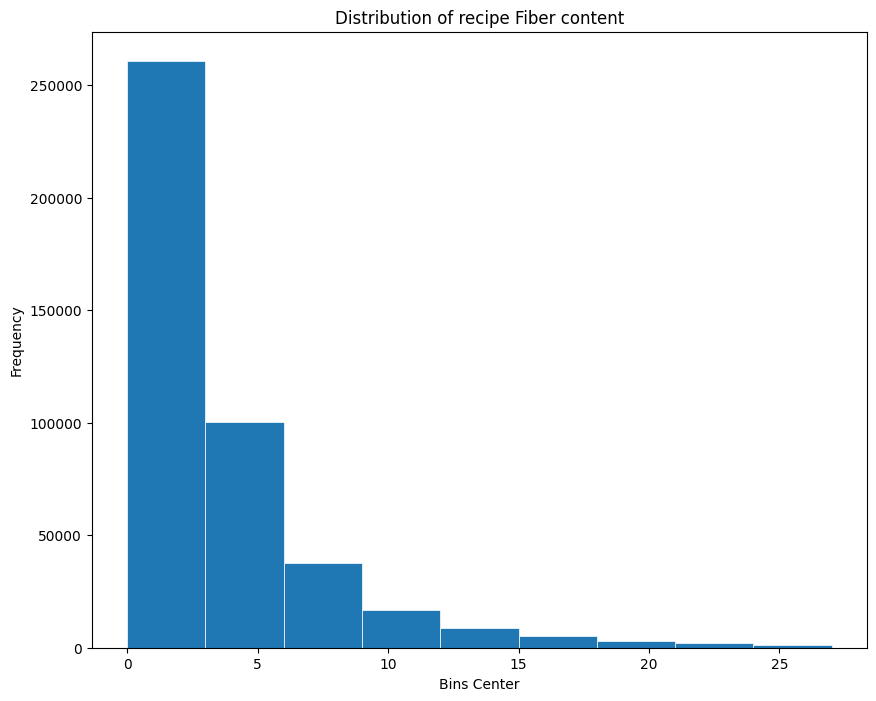

In [216]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Fiber content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.FiberContent.to_numpy(),bins=[0,3,6,9,12,15,18,21,24,27],linewidth=0.5, edgecolor="white")
plt.show()

<h3>Most of the recipes fall in range of 0-3 Fiber content

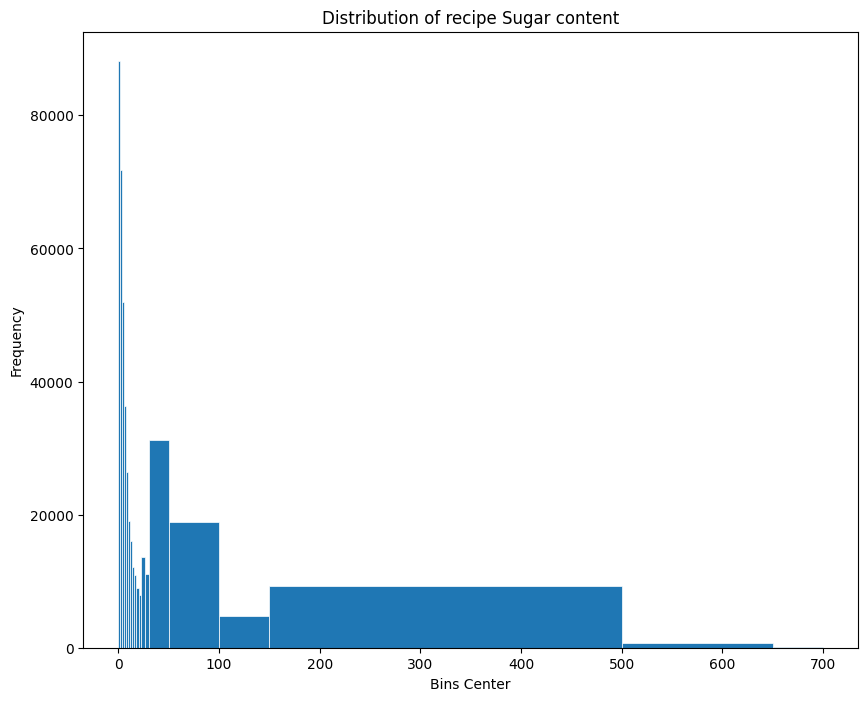

In [217]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Sugar content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.SugarContent.to_numpy(),bins=[0,2,4,6,8,10,12,14,16,18,20,22,26,30,50,100,150,500,650,700],linewidth=0.5, edgecolor="white")
plt.show()

<h3>Most of the recipes fall in range of 0-2 mg Sugar content

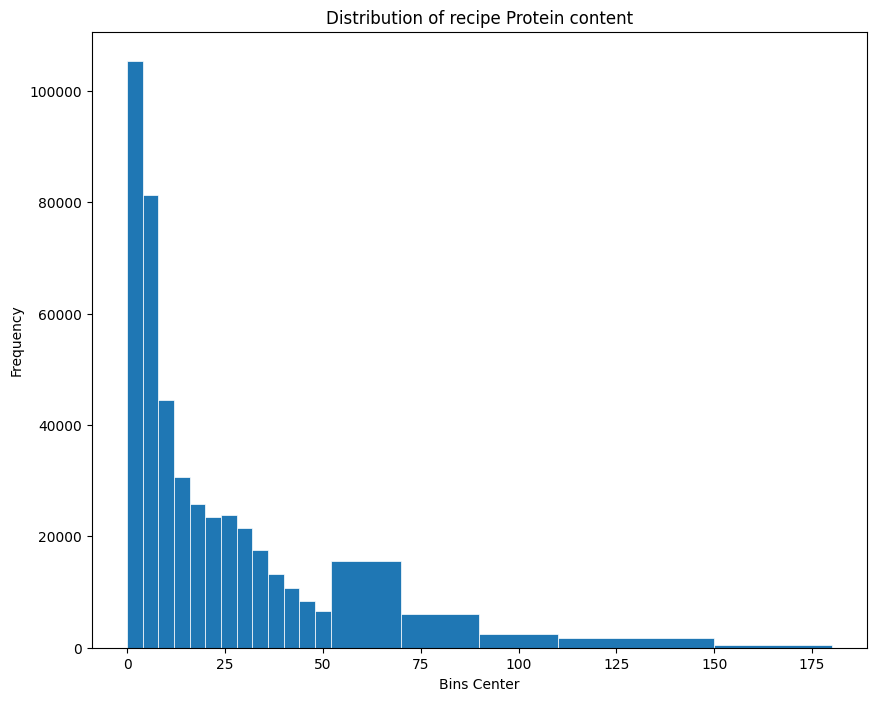

In [218]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Distribution of recipe Protein content')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.ProteinContent.to_numpy(),bins=[0,4,8,12,16,20,24,28,32,36,40,44,48,52,70,90,110,150,180],linewidth=0.5, edgecolor="white")
plt.show()

<h3>Most of the recipes fall in range of 0-4 Protein content

<h2>Nutritional_content’ Labeling

<h3>Adding new feature‘Nutritional_content’which categorizes recipes 
into groups like low_fat_content, high_fat_content, or normal_fat_content for all Nutritional components.
By the result from above data visulazing and from manual search from internet .


In [219]:
# Function to categorize nutritional values and format labels
def categorize_nutrition(value, low_threshold, high_threshold):
    if value <= low_threshold:
        return 'low'
    elif value > high_threshold:
        return 'high'
    else:
        return 'normal'

# Define thresholds for each nutritional component
carb_low, carb_high = 50, 120
fiber_low, fiber_high = 5, 10
sugar_low, sugar_high = 5, 13
protein_low, protein_high = 7, 20
calories_low, calories_high = 300, 750
fat_low, fat_high = 10, 25
cholesterol_low, cholesterol_high = 30, 90
sodium_low, sodium_high = 140, 700

# Apply categorization function to respective columns and combine results into one column
dataset['Nutritional_Category'] = (
    dataset['FatContent'].apply(lambda x: categorize_nutrition(x, fat_low, fat_high)) +'_fat_content'+ ', ' +
    dataset['CarbohydrateContent'].apply(lambda x: categorize_nutrition(x, carb_low, carb_high)) +'_carbohydrate_content'+ ', ' +
    dataset['FiberContent'].apply(lambda x: categorize_nutrition(x, fiber_low, fiber_high)) +'_fiber_content'+ ', ' +
    dataset['SugarContent'].apply(lambda x: categorize_nutrition(x, sugar_low, sugar_high)) +'_sugar_content'+ ', ' +
    dataset['ProteinContent'].apply(lambda x: categorize_nutrition(x, protein_low, protein_high)) + '_protein_content'+', ' +
    dataset['Calories'].apply(lambda x: categorize_nutrition(x, calories_low, calories_high)) + '_calories_content'+', ' +
    dataset['CholesterolContent'].apply(lambda x: categorize_nutrition(x, cholesterol_low, cholesterol_high)) + '_cholesterol_content'+', ' +
    dataset['SodiumContent'].apply(lambda x: categorize_nutrition(x, sodium_low, sodium_high))+'_sodium_content'
)
dataset

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ...",vegetarian,"low_fat_content, normal_carbohydrate_content, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522511,541378,Meg's Pumpkin Spice Bread,PT45M,PT30M,PT1H15M,"c(""eggs"", ""water"", ""pumpkin"", ""baking soda"", ""...",898.2,34.8,106.3,903.3,139.0,2.6,86.8,10.8,"c(""Beat eggs, add oil, water, and pumpkin; mix...",nonveg,"high_fat_content, high_carbohydrate_content, l..."
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,"c(""Dijon mustard"", ""garlic"", ""peppercorns"", ""s...",2063.4,172.4,433.8,766.3,3.2,0.7,0.1,117.0,"c(""Position rack in center of oven and preheat...",vegetarian,"high_fat_content, low_carbohydrate_content, lo..."
522514,541381,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,"c(""half-and-half"", ""heavy cream"", ""brandy"", ""s...",1271.3,117.2,470.9,192.5,33.9,0.0,17.3,12.8,"c(""heat half and half and heavy cream to a sim...",vegetarian,"high_fat_content, low_carbohydrate_content, lo..."


<h4>A new column, "Nutritional_Category," has been labeled to define the low, high, and normal content of each nutritional component.

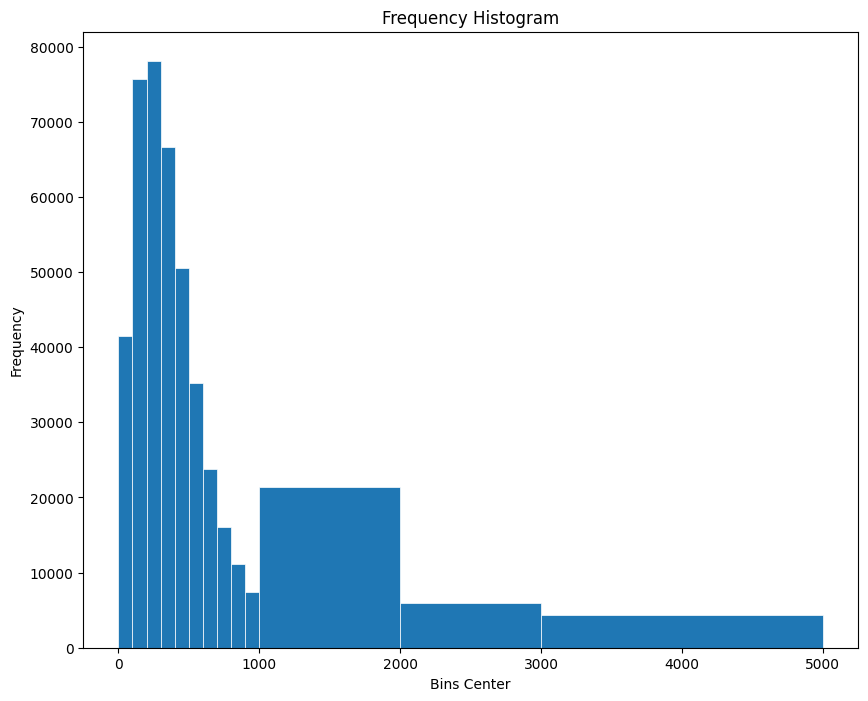

In [220]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(dataset.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

# Data Analysis:

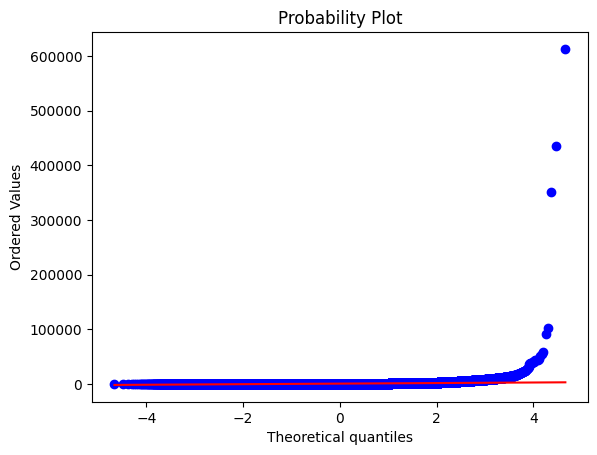

In [221]:
import pylab 
import scipy.stats as stats
stats.probplot(dataset.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

<h4>Probability plots were employed to gain insights into the distribution of calorie values in the dataset.
By analyzing these plots, we could understand the dataset's calorie profile better, identifying patterns that followed a normal distribution


<h1> Data Filtering based on Maximum Daily Intake Values:

<h3>The dataset was filtered to include recipes that fell within specific maximum daily intake values for various nutritional components.
These maximum values were carefully set to align with recommended dietary guidelines.


In [222]:
max_Calories=2000
max_daily_fat=100
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

<h4>We applied data filtering to include recipes that fell within specific maximum daily intake values for various nutritional components in the extracted_data.

In [223]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:14],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [224]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366649 entries, 0 to 522512
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               366649 non-null  int64  
 1   Name                   366649 non-null  object 
 2   CookTime               366649 non-null  object 
 3   PrepTime               366649 non-null  object 
 4   TotalTime              366649 non-null  object 
 5   RecipeIngredientParts  366649 non-null  object 
 6   Calories               366649 non-null  float64
 7   FatContent             366649 non-null  float64
 8   CholesterolContent     366649 non-null  float64
 9   SodiumContent          366649 non-null  float64
 10  CarbohydrateContent    366649 non-null  float64
 11  FiberContent           366649 non-null  float64
 12  SugarContent           366649 non-null  float64
 13  ProteinContent         366649 non-null  float64
 14  RecipeInstructions     366649 non-null  o

<h4>Observing the correlation amoung all Nutritional components

In [225]:
extracted_data.iloc[:,6:14].corr()

,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.849414,0.609180,0.527982,0.623162,0.386966,0.128474,0.718579
FatContent,0.849414,1.000000,0.619308,0.420770,0.208800,0.139622,0.025853,0.546495
CholesterolContent,0.609180,0.619308,1.000000,0.369865,0.066508,-0.051156,-0.031393,0.689682
SodiumContent,0.527982,0.420770,0.369865,1.000000,0.283183,0.243006,-0.071870,0.520722
CarbohydrateContent,0.623162,0.208800,0.066508,0.283183,1.000000,0.580805,0.370831,0.214909
FiberContent,0.386966,0.139622,-0.051156,0.243006,0.580805,1.000000,0.069632,0.237235
SugarContent,0.128474,0.025853,-0.031393,-0.071870,0.370831,0.069632,1.000000,-0.145576
ProteinContent,0.718579,0.546495,0.689682,0.520722,0.214909,0.237235,-0.145576,1.000000


<h2>Data Standardization:

In [226]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:14].to_numpy())

In [227]:
prep_data

array([[-0.72880649, -0.9398855 , -0.84429124, ...,  0.11142646,
         2.34649378, -0.80936203],
       [ 0.88049627,  0.46453026, -0.9653023 , ...,  3.85503677,
         2.55404089,  0.87486946],
       [-1.02537296, -1.07706099, -0.9653023 , ...,  0.43933394,
         0.98105224, -0.7383791 ],
       ...,
       [ 0.37902131,  0.76500991,  0.63809425, ..., -0.48973723,
        -0.32977163,  0.74580957],
       [ 0.09964071,  0.19017927,  0.59422775, ..., -0.65369097,
         1.75662303, -0.70611413],
       [-0.08675991, -0.28666887, -0.14242709, ..., -0.65369097,
         1.53815239, -0.76419107]])

# Model Training

# Implementing a nearest neighbors model using cosine

<h4>Nearest neighbors model using cosine similar to the distance metric and the brute-force algorithm for finding nearest neighbors. 

In [228]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

<h1>Building pipeline function:

<h4>pipeline using scikit-learn. It first applies a scaler (scaler) to standardize the input data. Then,we used nearest neighbors function (neigh.kneighbors) as a transformer to find the nearest neighbors of the input samples. The return_distance=False parameter ensures that only the indices of neighbors are returned. The pipeline performs both scaling and nearest neighbors search in sequence, making it ready for data preprocessing and nearest neighbors analysis

<h2>standardize the input data

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

<h2> Nearest neighbors function (neigh.kneighbors) as a transformer to find the nearest neighbors of the input samples

In [230]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

<h3>We have taken 10 Nearest Neighbors

<h2>Testing recommendation for first column using the above pipeline

In [231]:
extracted_data.iloc[0:1,6:15]

,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."


In [232]:
pipeline.transform(extracted_data.iloc[0:1,6:14].to_numpy())[0]

array([     0, 147588,  63611, 123138,  87374,  65816, 324031, 171225,
       116441, 324437])

<h2>Recommendation for fist column of our dataset

In [233]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:14].to_numpy())[0]]


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
215214,224421,Strawberries With Lemon Sugar and Lavender Syrup,PT15M,PT25M,PT40M,"c(""sugar"", ""sugar"", ""lemon peel"", ""water"", ""ho...",151.3,0.5,0.0,2.2,38.3,3.5,33.1,1.2,"c(""Mash 1/3 cup sugar and lemon peel in small ...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
95667,101103,Baked Apple for One,PT20M,PT2M,PT22M,"c(""apple"", ""water"", ""sugar"", ""raisins"", ""cinna...",149.2,0.2,0.0,2.4,39.1,3.5,33.6,0.5,"c(""Preheat the oven (or toaster oven) to 375.""...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
180993,189227,Fruit Compote With Honey Yogurt,PT25M,PT5M,PT30M,"c(""fresh ginger"", ""pears"", ""golden delicious a...",169.9,1.6,1.2,19.4,39.7,3.8,31.4,2.1,"c(""Combine apple juice and ginger in a large s...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
129906,136462,Champagne Infused Strawberry Soup,PT15M,PT15M,PT30M,"c(""water"", ""strawberries"", ""sugar"", ""mint leav...",162.3,0.5,0.0,4.8,38.3,3.3,32.8,1.1,"c(""In a saucepan, bring water, strawberries, s...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
98770,104283,Cranberry and Orange Mold,PT8H,PT30M,PT8H30M,"c(""navel oranges"", ""fresh cranberries"", ""sugar...",150.0,0.2,0.0,3.4,37.9,3.4,31.6,1.4,"c(""Peel oranges and reserve one fourth of the ...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
249567,259695,Strawberry Ice Tea,PT2H,PT20M,PT2H20M,"c(""fresh strawberries"", ""frozen unsweetened st...",146.6,0.4,0.0,17.0,38.7,3.5,31.8,1.1,"c(""In a large saucepan combine fresh or frozen...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
171384,179307,Blueberries in Blueberry Sauce,PT15M,PT5M,PT20M,"c(""blueberries"", ""water"", ""sugar"", ""fresh lemo...",148.2,0.5,0.0,1.9,38.0,3.6,31.1,1.1,"c(""In a medium saucepan, bring 2 cups blueberr...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
464327,481442,Apple Pie Filling,PT25M,PT45M,PT1H10M,"c(""apples"", ""sugar"", ""flour"", ""cinnamon"", ""nut...",153.6,0.3,0.0,2.2,40.0,4.0,33.3,0.6,"c(""Wash, peel and slice apples. Treat to preve...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."


<h2>Recommendation for specific Ingredient in the recipe (Here we checking for  Specific Ingredient "egg" in "RecipeIngredientParts" column )

In [234]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
26,64,Almond Pound Cake,PT1H,PT15M,PT1H15M,"c(""butter"", ""almond paste"", ""sugar"", ""eggs"", ""...",408.5,17.9,118.9,159.4,56.0,1.3,29.0,6.9,"c(""Preheat oven to 350 degrees Fahrenheit."", ""...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522490,541357,Chocolate Rum Snowballs,PT8M,PT15M,PT23M,"c(""rolled oats"", ""sweetened flaked coconut"", ""...",127.8,6.2,14.9,57.9,15.8,1.3,9.4,1.8,"c(""In a large mixing bowl, combine oats, 1 cup...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
522500,541367,Thick Peanut Pancakes,PT10M,PT45M,PT55M,"c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,121.4,503.9,100.3,6.0,20.2,23.2,"c(""Add rock sugar to milk."", ""Steam milk at lo...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
522505,541372,Chiles Rellenos Casserole,PT1H,PT1H,PT2H,"c(""green chilies"", ""cheddar cheese"", ""eggs"", ""...",557.5,44.5,226.8,1196.8,11.9,0.9,3.6,29.0,"c(""Preheat oven to 350F."", ""Butter a 2 quart c...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."


 <h2>Recommendations for veg recipes based on the "Veg_Nonveg" column.

In [235]:
extracted_data['Veg_Nonveg'] = extracted_data['Veg_Nonveg'].str.strip()
extracted_data[extracted_data['Veg_Nonveg'].str.contains("vegetarian",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
9,47,Butter Pecan Cookies,PT9M,PT55M,PT1H4M,"c(""butter"", ""brown sugar"", ""granulated sugar"",...",69.0,5.6,6.3,15.0,4.5,0.6,1.6,0.8,"c(""Preheat oven to 350 degrees."", ""Cream butte...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
13,51,Chai Tea,PT25M,PT15M,PT40M,"c(""water"", ""black tea"", ""cinnamon stick"", ""mil...",69.2,3.8,12.8,53.2,6.0,0.7,0.0,3.5,"c(""Bring water and spices to boil in saucepan....",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
17,55,Betty Crocker's Southwestern Guacamole Dip,PT2H,PT5M,PT2H5M,"c(""avocados"", ""tomatoes"", ""salt"", ""garlic"", ""l...",415.9,36.9,0.0,310.6,24.9,17.3,2.8,5.5,"c(""Peel and mash avocados until lumpy."", ""Add ...",vegetarian,"high_fat_content, low_carbohydrate_content, hi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522496,541363,11-Minute Microwave Caramels,PT11M,PT15M,PT26M,"c(""real butter"", ""brown sugar"", ""light corn sy...",109.8,4.4,12.3,48.9,17.9,0.0,14.3,0.6,"c(""Line a 9X13\"" baking pan with foil and ligh...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
522497,541364,Christmas Peanut Butter Kiss Cookies,PT8M,PT12M,PT20M,"c(""sweetened condensed milk"", ""peanut butter"",...",119.3,4.8,3.9,110.7,17.1,0.5,12.9,2.8,"c(""Preheat oven to 375 degrees F. Put sugar in...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
522498,541365,Leftover Rice Casserole,PT30M,PT15M,PT45M,"c(""rice"", ""sour cream"", ""diced green chilies"",...",666.6,26.8,79.0,553.5,82.5,2.4,2.8,22.1,"c(""Preheat oven to 350 degrees."", ""Sautee the ...",vegetarian,"high_fat_content, normal_carbohydrate_content,..."
522502,541369,Joe's Homemade Biscuits,PT15M,PT10M,PT25M,"c(""self-rising flour"", ""shortening"", ""milk"", ""...",460.7,25.2,20.7,823.6,49.2,1.7,0.1,8.2,"c(""Preheat oven to 450' and grease a cast-iron...",vegetarian,"high_fat_content, low_carbohydrate_content, lo..."


 <h2>Recommendations for nonveg recipes based on the "Veg_Nonveg" column.

In [236]:
extracted_data['Veg_Nonveg'] = extracted_data['Veg_Nonveg'].str.lower()
extracted_data[extracted_data['Veg_Nonveg'].str.contains("nonveg",regex=False)]


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
11,49,Chicken Breasts Lombardi,PT30M,PT45M,PT1H15M,"c(""fresh mushrooms"", ""butter"", ""boneless skinl...",627.7,24.9,203.0,848.9,13.7,0.6,2.0,57.9,"c(""Cook mushrooms in 2 tbsp butter in a large ...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo...",nonveg,"low_fat_content, low_carbohydrate_content, low..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a...",nonveg,"normal_fat_content, normal_carbohydrate_conten..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522500,541367,Thick Peanut Pancakes,PT10M,PT45M,PT55M,"c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,121.4,503.9,100.3,6.0,20.2,23.2,"c(""Add rock sugar to milk."", ""Steam milk at lo...",nonveg,"high_fat_content, normal_carbohydrate_content,..."
522505,541372,Chiles Rellenos Casserole,PT1H,PT1H,PT2H,"c(""green chilies"", ""cheddar cheese"", ""eggs"", ""...",557.5,44.5,226.8,1196.8,11.9,0.9,3.6,29.0,"c(""Preheat oven to 350F."", ""Butter a 2 quart c...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."
522508,541375,Amazing Ground Beef Stroganoff,PT20M,PT30M,PT50M,"c(""hamburger"", ""onion"", ""celery"", ""water chest...",422.3,28.6,106.0,634.7,14.1,1.4,5.7,27.3,"c(""Saute meat in a medium skillet until it los...",nonveg,"high_fat_content, low_carbohydrate_content, lo..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ...",nonveg,"normal_fat_content, low_carbohydrate_content, ..."


<h1>Creating end to end function from the above analysis

<h3>For better understanding we created functions for generating recommendation based on user input

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

<h3>Function to standardize the input data

In [238]:

def scaling(dataframe):
    scaler = StandardScaler()
    prep_data = scaler.fit_transform(dataframe.iloc[:, 6:14].to_numpy())
    return prep_data, scaler


<h3>Function for transformer to find the nearest neighbors of the input samples

In [239]:
def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine', algorithm='brute')
    neigh.fit(prep_data)
    return neigh

In [240]:
def build_pipeline(neigh, scaler, params):
    transformer = FunctionTransformer(neigh.kneighbors, kw_args=params)
    pipeline = Pipeline([('std_scaler', scaler), ('NN', transformer)])
    return pipeline

<h3>Function for generating recommendation for specific ingredients and recommendation for veg,nonveg recipes

In [241]:
def extract_data(dataframe, ingredient_filter, veg=True, max_nutritional_values=None):
    df = dataframe.copy()
    if max_nutritional_values:
        for column, maximum in zip(df.columns[6:15], max_nutritional_values):
            df = df[df[column] < maximum]
    if veg is not None:
        if veg:
            df = df[df['Veg_Nonveg'].str.lower().str.contains("vegetarian", regex=False)]
        else:
            df = df[df['Veg_Nonveg'].str.lower().str.contains("nonveg", regex=False)]
    if ingredient_filter:
        # Ensure ingredient_filter is a list
        if not isinstance(ingredient_filter, list):
            ingredient_filter = [ingredient_filter]
        for ingredient in ingredient_filter:
            # Use str.contains with regex=False to treat input as plain string
            df = df[df['RecipeIngredientParts'].str.contains(ingredient, regex=False)]
    return df


<h3>Function for Generation BMI 

In [242]:
# Function to calculate BMI
def calculate_bmi(input_dict):
    weight_kg = input_dict['weight']
    height_cm = input_dict['height']
    age = input_dict['age']
    height_m = height_cm / 100  # Convert height from centimeters to meters
    bmi = weight_kg / (height_m ** 2)  # BMI formula: weight (kg) / (height (m) ^ 2)
    return bmi

In [243]:
def apply_pipeline(pipeline, _input, extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

<h3>Final Recommendation function

In [244]:
def recommend(dataframe, _input, veg=True, ingredient_filter=None, max_nutritional_values=None, params={'return_distance': False}):
    extracted_data = extract_data(dataframe, ingredient_filter, veg, max_nutritional_values)
    prep_data, scaler = scaling(extracted_data)
    neigh = nn_predictor(prep_data)
    pipeline = build_pipeline(neigh, scaler, params)
    return apply_pipeline(pipeline, _input, extracted_data)

<h2>Testing recommendations for the first column of our datase Using "end to end function"

In [245]:
test_input=extracted_data.iloc[0:1,6:14].to_numpy()
recommend(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
317223,329316,Baked Mixed Fruit,PT20M,PT15M,PT35M,"c(""plums"", ""pineapple"", ""brown sugar"", ""butter...",143.6,1.4,2.5,12.6,34.3,3.6,29.8,1.6,"c(""Heat oven to 350 degrees."", ""Grease a 3 qt ...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
150574,157820,Cardamom Citrus Fruit Salad,PT25M,PT15M,PT40M,"c(""pink grapefruit"", ""navel oranges"", ""honey"",...",143.9,0.3,0.0,2.1,37.9,3.4,30.7,1.5,"c(""Peel the fruit. Cut away the membranes of t...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
214345,223533,Brown Sugar Peaches,PT2H,PT20M,PT2H20M,"c(""golden brown sugar"", ""fresh lemon juice"")",135.4,0.6,0.0,3.4,33.8,3.4,30.9,2.1,"c(""Gently toss sliced peaches, golden brown su...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."
397986,412552,Pineapple Patio Cooler (Mocktail),PT5M,PT5M,PT10M,"c(""cranberry juice"", ""ginger ale"", ""orange"")",147.4,0.4,0.0,2.8,36.1,3.4,29.3,1.9,"c(""Fill a cocktail shaker 1/2 full with ice."",...",vegetarian,"low_fat_content, low_carbohydrate_content, low..."


# Model Testing for user Inputs

In [246]:
# testing on random inputs 

In [247]:
#p=[170,12,34,51,13,3,12,14,15,7]

In [248]:
# import numpy as np

# test_input1 = [200, 12, 3, 0, 0, 3, 12, 0, 0]
# test_input12 = np.array(test_input1).reshape(1, -1)
# recommend(dataset,test_input12,max_list)

In [249]:
# created a dictionary of inputs 

<h3>Inputs are taken in the form of Dictionary 

In [250]:
test_input_dict = {
    'height':155,
    'weight':61,
    'age':19,
    'Calories': 500,
    'FatContent': 12,
    'CholesterolContent': 0,
    'SodiumContent': 0,
    'CarbohydrateContent': 3,
    'FiberContent': 12,
    'SugarContent': 10,
    'ProteinContent': 30,
    'Veg_Nonveg': 'vegetarian',  # 'veg' or 'non_veg' indicating the type of recipe
    'specific_ingredient' :'milk'
}


<h3>Passing these input Dictionary values to all the function which are present in end to end function

In [251]:

# Extract nutritional values and 'veg_nonveg' flag from the input dictionary
nutritional_values = [test_input_dict[key] for key in ['Calories', 'FatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
veg_flag = test_input_dict['Veg_Nonveg']
# Determine veg flag
veg = True if veg_flag.lower() == 'vegetarian' else (False if veg_flag.lower() == 'nonveg' else No)
                                                     # Convert nutritional values to NumPy array and reshape
test_input = np.array(nutritional_values).reshape(1, -1)
print(veg)

True


In [252]:
specific_ingredient = test_input_dict.get('specific_ingredient', None)

In [253]:

# Calculate BMI using the function
bmi = calculate_bmi(test_input_dict)

# Print the calculated BMI
print("Your BMI is:", bmi)

# Provide BMI interpretation based on standard categories
if bmi < 18.5:
    print("You are underweight.")
elif 18.5 <= bmi < 24.9:
    print("Your weight is normal.")
elif 25 <= bmi < 29.9:
    print("You are overweight.")
else:
    print("You are obese.")

Your BMI is: 25.390218522372525
You are overweight.


# Recommendation for the user input (test_input_dict) 

In [254]:
# Call the recommend function with determined veg flag
recommendation = recommend(dataset, test_input, veg=veg, ingredient_filter=specific_ingredient, max_nutritional_values=None, params={'return_distance': False})


In [255]:
recommendation

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,Veg_Nonveg,Nutritional_Category
505664,524099,Blueberry Banana Smoothie,PT4M,PT3M,PT7M,"c(""banana"", ""blueberries"", ""yogurt"", ""skim mil...",431.7,18.4,28.5,238.6,55.1,7.7,28.5,18.0,"c(""1. Place ingredients in a blender and blend...",vegetarian,"normal_fat_content, normal_carbohydrate_conten..."
318805,330936,Yukon Gold and Edamame Mash,PT50M,PT20M,PT1H10M,"c(""yukon gold potatoes"", ""coarse salt"", ""fresh...",422.2,18.0,24.4,33.3,49.2,8.5,2.3,20.4,"c(""In a saucepan, add the potatoes and enough ...",vegetarian,"normal_fat_content, low_carbohydrate_content, ..."
134513,141209,Red Lentil &amp; Coconut Curry,PT30M,PT15M,PT45M,"c(""red lentils"", ""water"", ""fresh ginger"", ""fre...",470.0,21.5,15.3,89.1,53.0,10.6,5.6,21.3,"c(""Put the lentils into a sacuepan and add the...",vegetarian,"normal_fat_content, normal_carbohydrate_conten..."
188090,196503,Sweet Lentils,PT1H,PT10M,PT1H10M,"c(""red lentils"", ""yellow lentils"", ""vegetable ...",453.6,14.9,0.0,47.9,63.8,10.6,15.8,22.9,"c(""Mix everything except the nuts and raisins ...",vegetarian,"normal_fat_content, normal_carbohydrate_conten..."
186282,194660,Low Fat Shepherd's Pie!,PT30M,PT30M,PT1H,"c(""canola oil"", ""carrots"", ""onion"", ""Worcester...",365.3,8.0,50.2,256.1,48.0,9.1,9.5,26.0,"c(""In a large saucepan or wok, saute carrots a...",vegetarian,"low_fat_content, low_carbohydrate_content, nor..."
